In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from matplotlib import colors
from scipy.stats import multivariate_normal
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import accuracy_score
from sklearn import svm

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

## losowanie danych

In [3]:
S1 = np.array([[4,2],[2,4]])
S2 = np.array([[4,2],[2,4]])

m1 = np.array([-1,-1])
m2 = np.array([2,2])

n1 = 30
n2 = 20

X1 = pd.DataFrame(data=np.random.multivariate_normal(m1,S1,n1),columns=["x","y"])
X2 = pd.DataFrame(data=np.random.multivariate_normal(m2,S2,n2),columns=["x","y"])

X1['class'] = 1
X2['class'] = 2

data = pd.concat([X1,X2], ignore_index = True)

## Definicja klasyfikatora LDA

In [4]:
lda = LDA()
lda.fit(data.loc[:,data.columns != 'class'],data['class'])

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

### Rysowanie LDA

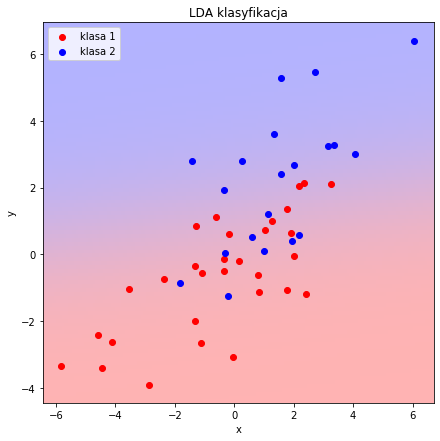

In [5]:
fig, ax = plt.subplots(1,1, figsize=(7,7))
ax.set(xlabel='x', ylabel='y')
ax.set_title('LDA klasyfikacja')
ax.label_outer()
#ax.contour(xp,yp,Z1,colors='white', levels=1)
ax.scatter(X1['x'],X1['y'], c='red', label='klasa 1')
ax.scatter(X2['x'],X2['y'], c='blue', label='klasa 2')
ax.legend()

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Zlda = lda.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Zlda = Zlda[:, 1].reshape(xx.shape)
ax.pcolormesh(xx, yy, Zlda, cmap='red_blue_classes',
                norm=colors.Normalize(0., 1.), zorder=0)

plt.show()

## KLasyfikator SVM
    Dla 9 różnych wartości C stworzenie klasyfikatora i analizowanie klasyfikacji. Narysowanie wyników na wykresach

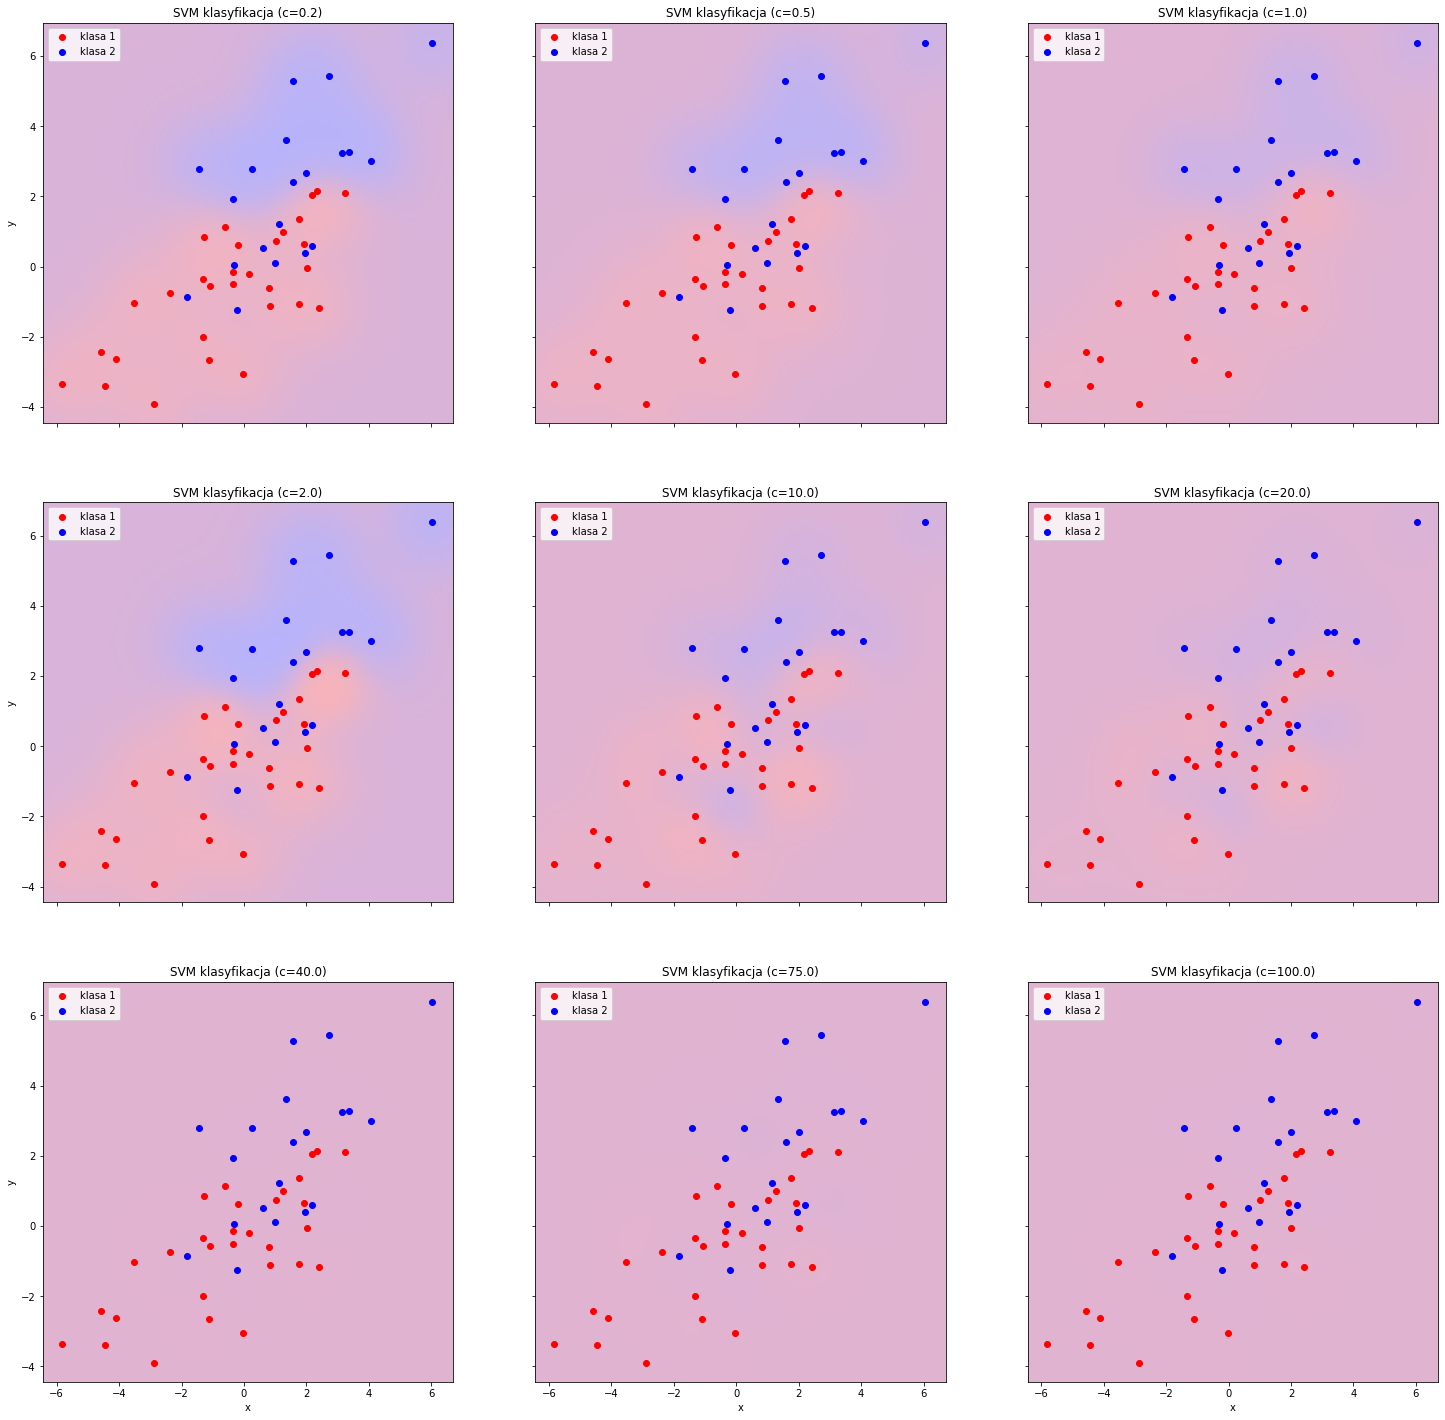

In [6]:
figC, axC = plt.subplots(3,3, figsize=(25,25))
c = [0.2, 0.5, 1, 2, 10, 20, 40, 75, 100]
clf = []
Z = []
accuracy = []
for i in range(3):
    for j in range(3):
        #c = c + 4
        svc = svm.SVC(C=c[i*3+j],probability=True,gamma='auto')
        svc.fit(data.loc[:,data.columns != 'class'],data['class'])
        clf.append(svc)
        
        axC[i,j].set(xlabel='x', ylabel='y')
        axC[i,j].set_title('SVM klasyfikacja (c=%.1f)' %c[i*3+j])
        axC[i,j].label_outer()
        #ax.contour(xp,yp,Z1,colors='white', levels=1)
        axC[i,j].scatter(X1['x'],X1['y'], c='red', label='klasa 1')
        axC[i,j].scatter(X2['x'],X2['y'], c='blue', label='klasa 2')
        axC[i,j].legend()

        Ztmp = clf[i*3+j].predict_proba(np.c_[xx.ravel(), yy.ravel()])
        Z.append(Ztmp[:, 1].reshape(xx.shape))
        axC[i,j].pcolormesh(xx, yy, Z[i*3+j], cmap='red_blue_classes',
                        norm=colors.Normalize(0., 1.), zorder=0)
        
        accuracy.append(accuracy_score(clf[i*3+j].predict(data.loc[:,data.columns != 'class']), data['class']))

plt.show()

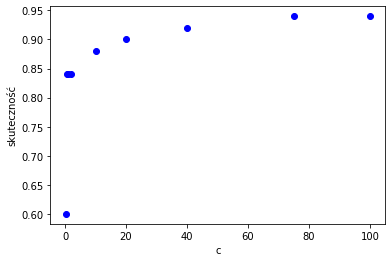

In [7]:
plt.plot(c, accuracy, "bo")
plt.xlabel("c")
plt.ylabel("skuteczność")
plt.show()